In [9]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import date
import re

stopwords = set(STOPWORDS)
stopwords.update(['dont','said','theres','youre','a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves'])

def percentage(part, whole):
	return 100*(float(part)/float(whole))

today = date.today()
todaydate = today.strftime("%d %B %Y")

In [10]:
# Twitter API details

consumerKey = ''
consumerSecret = ''
accessToken = ''
accessTokenSecret = ''

In [11]:
searchTerm = 'crypto'                 # Topic to search in Twitter. Leave as '' for all latest tweets.
quantity = 200                        # Number of latest tweets to compile.
geo = ''                            # Geocode of tweet. Leave as '' for global tweets.   - latitude,longitude,radius(in km or mi)(leave no spaces)

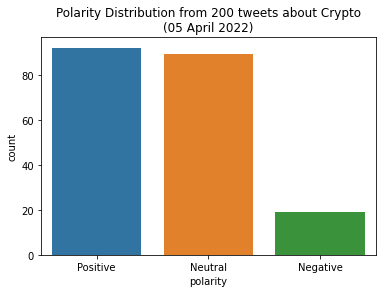

In [12]:
def compiletweets(search, number):

	auth = tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
	auth.set_access_token(accessToken, accessTokenSecret)
	api = tweepy.API(auth)

	tweets = tweepy.Cursor(api.search_tweets, search + ' -filter:retweets', lang='en', geocode=geo).items(number)

	text = []
	id = []
	tweetdate = []
	polarity_score = []
	polarity = []
	subjectivity = []

	for tweet in tweets:
		text.append(tweet.text)
		id.append(tweet.id)
		tweetdate.append(tweet.created_at)
		score = TextBlob(tweet.text).sentiment.polarity
		subjectivity.append(TextBlob(tweet.text).sentiment.subjectivity)
		polarity_score.append(score)
		if (score == 0.00):
			polarity.append('Neutral')

		elif (score < 0.00):
			polarity.append('Negative')

		elif (score > 0.00):
			polarity.append('Positive')
		
	tweetdict = {'text':text, 'id':id, 'date_created':tweetdate, 'polarity_score':polarity_score, 'polarity':polarity, 'subjectivity':subjectivity}

	df = pd.DataFrame(tweetdict)

	stopwords.update([search.lower()])

	return df

df = compiletweets(searchTerm, quantity)

sns.countplot(x=df['polarity'])
if searchTerm == '':
	plt.title(f'Polarity Distribution from {quantity} tweets\n({todaydate})')
else:
	plt.title(f'Polarity Distribution from {quantity} tweets about {searchTerm.title()}\n({todaydate})')

plt.show()

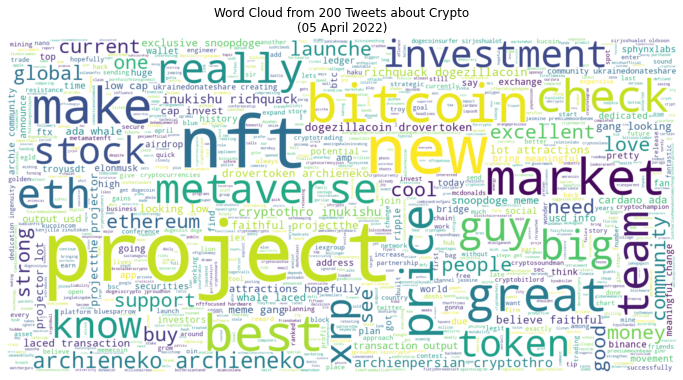

In [13]:
def wordcloud():
    raw_string = ''.join(df['text'])
    no_links = re.sub(r'http\S+', '', raw_string)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 2]
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stopwords]

    wordcloud = WordCloud(background_color="white", max_words=2000, width=1600, height=800, max_font_size=200)
    clean_string = ','.join(words)
    wordcloud.generate(clean_string)

    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    if searchTerm != "":
        plt.title(f'Word Cloud from {quantity} Tweets about {searchTerm.title()}\n({todaydate})')
    else:
        plt.title(f'Word Cloud from {quantity} Tweets\n({todaydate})')
    plt.axis("off")
    plt.show()

wordcloud()

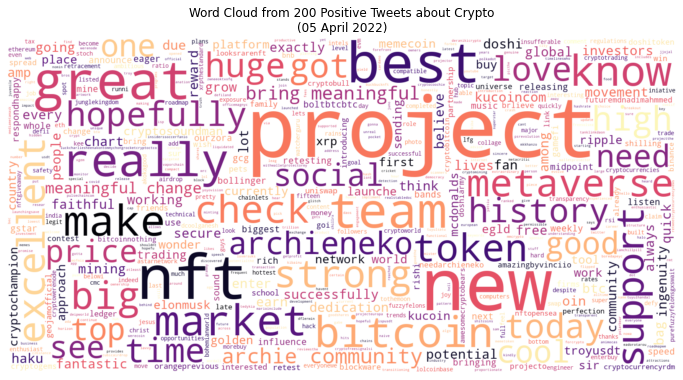

In [14]:
def positivecloud():

    compiletweets(searchTerm, quantity)

    positivetweets = df[df['polarity']=='Positive']['text']
    raw_string = ''.join(positivetweets)
    no_links = re.sub(r'http\S+', '', raw_string)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 2]
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stopwords]

    wordcloud = WordCloud(background_color="white", max_words=2000, width=1600, height=800, max_font_size=200, colormap='magma')
    clean_string = ','.join(words)
    wordcloud.generate(clean_string)

    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    if searchTerm != "":
        plt.title(f'Word Cloud from {quantity} Positive Tweets about {searchTerm.title()}\n({todaydate})')
    else:
        plt.title(f'Word Cloud from {quantity} Positive Tweets\n({todaydate})')
    plt.axis("off")
    plt.show()

positivecloud()

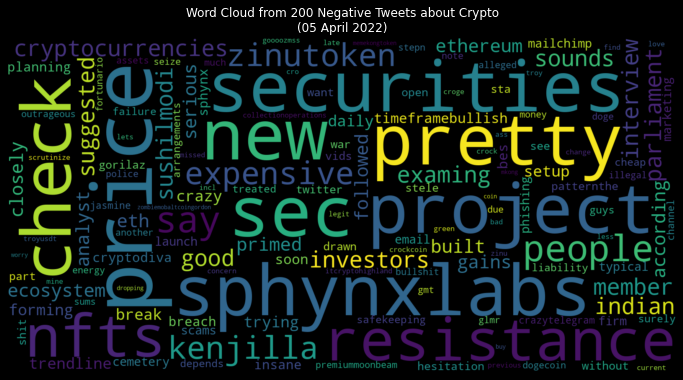

In [15]:
def negativecloud():
    negativetweets = df[df['polarity']=='Negative']['text']
    raw_string = ''.join(negativetweets)
    no_links = re.sub(r'http\S+', '', raw_string)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 2]
    words = [w.lower() for w in words]
    words = [w for w in words if w not in stopwords]

    wordcloud = WordCloud(background_color="black", max_words=2000, width=1600, height=800, max_font_size=200, )
    clean_string = ','.join(words)
    wordcloud.generate(clean_string)

    plt.figure(figsize=(12,10),facecolor='black')
    plt.imshow(wordcloud, interpolation='bilinear')
    if searchTerm != "":
        plt.title(f'Word Cloud from {quantity} Negative Tweets about {searchTerm.title()}\n({todaydate})', color='white')
    else:
        plt.title(f'Word Cloud from {quantity} Negative Tweets\n({todaydate})', color='white')
    plt.axis("off")
    plt.show()

negativecloud()